In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
parking = pd.read_excel('parking.xls')

In [3]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [7]:
# We want to check the different types of building statuses

parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [8]:
# If we want to know the parking proprty type

parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [9]:
# If we want to check the building states

parking['Bldg State'].value_counts()

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
WA    242
CO    242
IL    241
MI    235
AZ    222
GA    218
NC    212
MO    209
OH    201
IN    157
TN    152
MT    150
LA    149
NJ    146
KY    137
NM    136
OK    130
MA    127
AL    124
WI    122
WV    106
OR    105
MN     98
ME     97
UT     96
SC     95
MS     87
AR     83
ND     80
NV     75
VT     75
KS     74
IA     74
SD     66
ID     63
CT     58
NE     51
WY     45
NH     39
DE     28
RI     27
Name: Bldg State, dtype: int64

In [10]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1. What is the distribution or values for owned/leased?

<BarContainer object of 9060 artists>

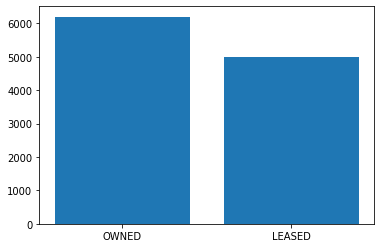

In [13]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [17]:
owned_leased = pd.pivot_table(parking,index = 'Owned/Leased', values= 'Total Parking Spaces',aggfunc='count')

In [18]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


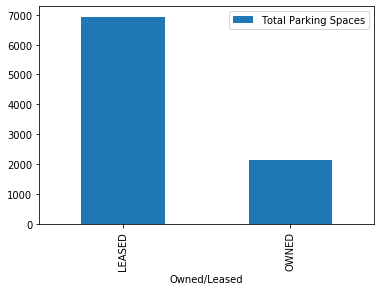

In [19]:
owned_leased.plot(kind='bar') #using inbuilt pandas capability 

# 2. In which bldg state parking situation is in excess - put it in order

In [20]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [21]:
excess_parking = pd.pivot_table(parking, index = 'Bldg State', columns='Bldg Status',values= 'Total Parking Spaces')

In [22]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [23]:
#since we are interested in excess, we will remove null values from column excess

excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [24]:
excess_parking #null values removed

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


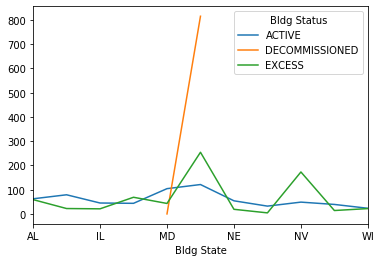

In [25]:
excess_parking.plot()

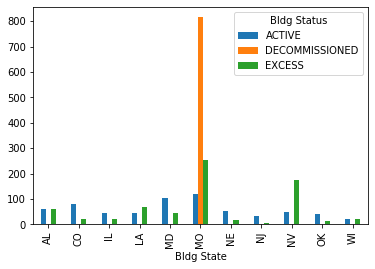

In [26]:
# let's convert this into a bar graph

excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

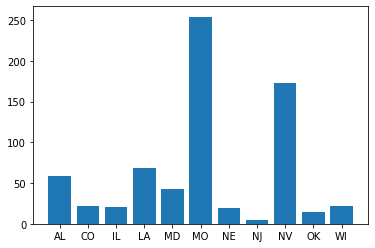

In [27]:


plt.bar(excess_parking.index,excess_parking.EXCESS)

In [30]:
#We need to sort the Excess column

excess_parking_sorted = excess_parking.EXCESS.sort_values()

In [31]:
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

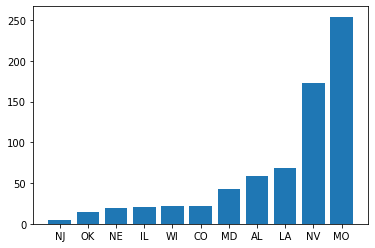

In [32]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

# 3. Which cities have decommissioned parking?


In [33]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [36]:
decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED'] #checking the Bldg Status column for anything showing 'DECOMMISSIONED'

In [37]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [39]:
decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']

# 4. In which type of property parking space is in excess

In [40]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [41]:
# this method will optimize the process of filtering and pivots into one statement

excess_parking_property = pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'], index = 'Property Type', values= 'Total Parking Spaces')

In [42]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5. Where is there more active parking - Owned / Leased


In [43]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [45]:
active_parking = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Owned/Leased', values = 'Total Parking Spaces')

In [46]:
active_parking #on aveerage the owned has more parking spaces than leased that are active.

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [47]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [ ]:
## How do we find the percentage 

In [48]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [49]:
active_parking['%Contri'] = active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

In [50]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6. What States have most leased parking?

In [51]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [54]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index = 'Bldg State', values = 'Total Parking Spaces')

In [58]:
state_leased_parking.sort_values('Total Parking Spaces', ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [59]:
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
